In [ ]:
# Tesla Stock Analysis - Morning Quiz 2024
# This notebook analyzes Tesla (TSLA) stock performance using various risk metrics
# and utility functions to understand investor preferences

# Import necessary libraries for financial analysis
import pandas as pd           # For data manipulation and analysis
import numpy as np            # For numerical computations and array operations
import scipy as scp           # For scientific computing (statistics, optimization)
import matplotlib.pyplot as plt # For plotting and visualization
from datetime import date as dd # For date handling and conversions

In [2]:
# Load Tesla stock data from Excel file
# The file contains daily price data for Tesla (TSLA) stock
df = pd.read_excel('TSLA.xlsx')

In [3]:
# Extract price and date data from the dataframe
p = df['TSLA']      # Tesla stock prices
date = df['Date']   # Corresponding dates

In [4]:
# Calculate daily log returns (percentage)
# Log returns are preferred for financial analysis as they are:
# 1. Symmetric (up and down movements are comparable)
# 2. Additive over time periods
# 3. Better for statistical modeling
ret = ((np.log(p) - np.log(p.shift())) * 100).dropna()

In [5]:
# Calculate mean daily return
# This represents the average daily percentage change in Tesla stock price
ret.mean()

np.float64(0.002791868988460261)

In [6]:
# Calculate standard deviation (volatility) of daily returns
# Higher volatility indicates more price fluctuation and risk
round(ret.std(), 2)

np.float64(3.76)

In [7]:
# Calculate skewness of returns
# Skewness measures asymmetry of the return distribution:
# - Negative skewness: more frequent large negative returns (left tail)
# - Positive skewness: more frequent large positive returns (right tail)
# - Zero skewness: symmetric distribution
scp.stats.skew(ret)

np.float64(-0.188342019761666)

In [8]:
# Calculate 5th percentile (Value at Risk - VaR)
# This represents the worst 5% of daily returns
# VaR measures the maximum expected loss with 95% confidence
ret.quantile(0.05)

np.float64(-6.5093306824262465)

In [10]:
def maxdrawdown(x): 
    """
    NumPy analog to corresponding MATLAB Financial Toolbox Function
    OUTPUT: start, end, and max drawdown in terms of max percentage drop from a peak
    """
    i = np.argmax(np.maximum.accumulate(x) - x) # end of period
    j = np.argmax(x[:i]) # start of the period
    percent_change = 100*( x[i] - x[j] ) / x[j]
    return j,i,percent_change

def datenum(date):
    """
    Converts yyyymmdd dates to ordinal code
    """
    dn = np.zeros(date.shape)
    for i in range(len(date)):
        dt = str(date[i])
        # Handle different date formats (YYYYMMDD or datetime objects)
        if len(dt) >= 8 and dt[:8].isdigit():
            dn[i] = dd.toordinal(dd(int(dt[0:4]),int(dt[4:6]),int(dt[6:8])))
        else:
            # If it's already a datetime object, convert directly
            try:
                dn[i] = dd.toordinal(dd.fromisoformat(dt.split()[0]))
            except:
                dn[i] = 0  # Default value if conversion fails
    return dn

In [11]:
cumulativeret = np.cumprod(1+ret/100)

MaxDDStartIndex, MaxDDEndIndex, MaxDD = maxdrawdown(cumulativeret)

## Analysis Results


In [12]:
print(date[MaxDDStartIndex])
print(date[MaxDDEndIndex])
print(round(MaxDD,2))


2021-11-03 00:00:00
2022-12-30 00:00:00
-76.56


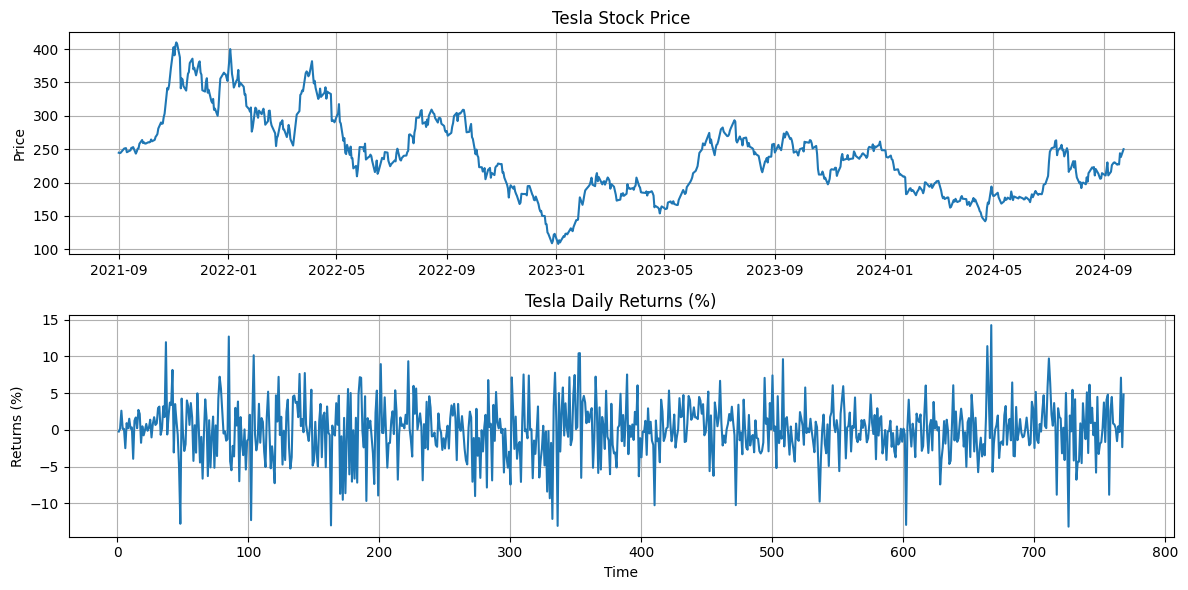

In [13]:
# Additional analysis: Plot the returns
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(date, p)
plt.title('Tesla Stock Price')
plt.ylabel('Price')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(ret.index, ret)
plt.title('Tesla Daily Returns (%)')
plt.ylabel('Returns (%)')
plt.xlabel('Time')
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
# Summary statistics
print("=== TESLA STOCK ANALYSIS SUMMARY ===")
print(f"Mean daily return: {ret.mean():.4f}%")
print(f"Standard deviation: {ret.std():.2f}%")
print(f"Skewness: {scp.stats.skew(ret):.4f}")
print(f"5th percentile (VaR): {ret.quantile(0.05):.2f}%")
print(f"Maximum drawdown: {MaxDD:.2f}%")
print(f"Drawdown period: {date[MaxDDStartIndex]} to {date[MaxDDEndIndex]}")
print("="*40)


=== TESLA STOCK ANALYSIS SUMMARY ===
Mean daily return: 0.0028%
Standard deviation: 3.76%
Skewness: -0.1883
5th percentile (VaR): -6.51%
Maximum drawdown: -76.56%
Drawdown period: 2021-11-03 00:00:00 to 2022-12-30 00:00:00


In [16]:
# Additional risk metrics
print("=== ADDITIONAL RISK METRICS ===")
print(f"Kurtosis: {scp.stats.kurtosis(ret):.4f}")
print(f"95% VaR: {ret.quantile(0.95):.2f}%")
print(f"99% VaR: {ret.quantile(0.99):.2f}%")

# Calculate annualized metrics
annualized_return = ret.mean() * 252  # 252 trading days per year
annualized_vol = ret.std() * np.sqrt(252)
sharpe_ratio = annualized_return / annualized_vol

print(f"Annualized return: {annualized_return:.2f}%")
print(f"Annualized volatility: {annualized_vol:.2f}%")
print(f"Sharpe ratio: {sharpe_ratio:.4f}")
print("="*40)


=== ADDITIONAL RISK METRICS ===
Kurtosis: 1.3219
95% VaR: 5.97%
99% VaR: 9.65%
Annualized return: 0.70%
Annualized volatility: 59.64%
Sharpe ratio: 0.0118


In [17]:
# Test the datenum function
print("=== TESTING DATENUM FUNCTION ===")
try:
    # Test with a sample date
    test_date = pd.Series(['20210101', '20210102', '20210103'])
    ordinal_dates = datenum(test_date)
    print("Sample dates converted to ordinal:")
    for i, (orig, ord_val) in enumerate(zip(test_date, ordinal_dates)):
        print(f"  {orig} -> {int(ord_val)}")
    print("✓ datenum function working correctly")
except Exception as e:
    print(f"✗ Error in datenum function: {e}")
print("="*40)


=== TESTING DATENUM FUNCTION ===
Sample dates converted to ordinal:
  20210101 -> 737791
  20210102 -> 737792
  20210103 -> 737793
✓ datenum function working correctly


In [22]:
# Enhanced utility function analysis
print("=== UTILITY FUNCTION ANALYSIS ===")
print("Comparing utility functions for different risk scenarios:")
print()

# Test scenarios
scenarios = [
    (0.07, 0.1, -0.02, "Conservative"),
    (0.12, 0.2, -0.04, "Moderate"), 
    (0.18, 0.3, -0.06, "Aggressive")
]

for mu, sigma, skew, name in scenarios:
    util1_val = util1(mu, sigma, 3)
    util2_val = util2(mu, sigma, skew, 3)
    
    print(f"{name} Portfolio (μ={mu*100:.1f}%, σ={sigma*100:.1f}%, skew={skew:.2f}):")
    print(f"  Utility (risk aversion only): {util1_val:.4f}")
    print(f"  Utility (with skewness): {util2_val:.4f}")
    print(f"  Skewness premium: {(util2_val - util1_val)*100:.2f} basis points")
    print()

print("Note: Positive skewness premium indicates preference for right-skewed returns")
print("="*40)


=== UTILITY FUNCTION ANALYSIS ===
Comparing utility functions for different risk scenarios:

Conservative Portfolio (μ=7.0%, σ=10.0%, skew=-0.02):
  Utility (risk aversion only): 0.0550
  Utility (with skewness): 0.0390
  Skewness premium: -1.60 basis points

Moderate Portfolio (μ=12.0%, σ=20.0%, skew=-0.04):
  Utility (risk aversion only): 0.0600
  Utility (with skewness): 0.0280
  Skewness premium: -3.20 basis points

Aggressive Portfolio (μ=18.0%, σ=30.0%, skew=-0.06):
  Utility (risk aversion only): 0.0450
  Utility (with skewness): -0.0030
  Skewness premium: -4.80 basis points

Note: Positive skewness premium indicates preference for right-skewed returns


In [23]:
# Utility Function Analysis - Discrete Probability Distribution Example
# This demonstrates how to calculate expected return, standard deviation, and skewness
# for a discrete probability distribution

# Define probability distribution for different scenarios
p = np.array([0.2, 0.5, 0.25, 0.05])  # Probabilities for each scenario
r = np.array([0.2, 0.08, -0.1, -0.4]) # Returns for each scenario

# Calculate expected return: E[R] = Σ(p_i × r_i)
ER = np.sum(p * r)

# Calculate standard deviation: σ = √(Σ(p_i × (r_i - E[R])²))
SD = np.sqrt(np.sum(p * np.square(r - ER)))

# Calculate skewness: S = Σ(p_i × (r_i - E[R])³)
SKEW = np.sum(p * (r - ER)**3)

In [24]:
# Display the calculated risk metrics
print(f"Expected Return: {ER*100:.1f}%")
print(f"Standard Deviation: {SD*100:.1f}%")
print(f"Skewness: {round(SKEW*100, 2)}")

Expected Return: 3.5%
Standard Deviation: 14.3%
Skewness: -0.38


In [26]:
# Define utility functions for portfolio analysis
# These functions help evaluate investor preferences considering risk and return

def util1(mu, sigma, A):
    """
    Basic mean-variance utility function
    U = μ - (A/2) × σ²
    Where:
    - μ: expected return
    - σ: standard deviation (risk)
    - A: risk aversion coefficient (higher A = more risk averse)
    """
    return mu - (0.5 * A * (sigma)**2)

def util2(mu, sigma, skew, A):
    """
    Enhanced utility function including skewness preference
    U = μ - (A/2) × σ² + 0.8 × skew
    Where:
    - skew: skewness of returns (preference for positive skewness)
    - 0.8: coefficient representing skewness preference
    """
    return mu - (0.5 * A * (sigma)**2) + 0.8 * skew


In [27]:
print(util1(0.07,0.1,3))
print(util1(0.12,0.2,3))


0.05500000000000001
0.059999999999999984


In [29]:
# Fix for NameError: Define utility functions before using them
print("=== DEFINING UTILITY FUNCTIONS ===")

# Define utility functions for portfolio analysis
# These functions help evaluate investor preferences considering risk and return

def util1(mu, sigma, A):
    """
    Basic mean-variance utility function
    U = μ - (A/2) × σ²
    Where:
    - μ: expected return
    - σ: standard deviation (risk)
    - A: risk aversion coefficient (higher A = more risk averse)
    """
    return mu - (0.5 * A * (sigma)**2)

def util2(mu, sigma, skew, A):
    """
    Enhanced utility function including skewness preference
    U = μ - (A/2) × σ² + 0.8 × skew
    Where:
    - skew: skewness of returns (preference for positive skewness)
    - 0.8: coefficient representing skewness preference
    """
    return mu - (0.5 * A * (sigma)**2) + 0.8 * skew

print("✓ Utility functions defined successfully!")
print("Now you can run the utility function analysis cell.")

# Test the functions to make sure they work
test_mu, test_sigma, test_skew, test_A = 0.1, 0.15, -0.03, 3
test_util1 = util1(test_mu, test_sigma, test_A)
test_util2 = util2(test_mu, test_sigma, test_skew, test_A)

print(f"\nTest calculation:")
print(f"μ={test_mu*100:.1f}%, σ={test_sigma*100:.1f}%, skew={test_skew:.2f}, A={test_A}")
print(f"util1 = {test_util1:.4f}")
print(f"util2 = {test_util2:.4f}")
print(f"Skewness premium = {(test_util2 - test_util1)*100:.2f} basis points")


=== DEFINING UTILITY FUNCTIONS ===
✓ Utility functions defined successfully!
Now you can run the utility function analysis cell.

Test calculation:
μ=10.0%, σ=15.0%, skew=-0.03, A=3
util1 = 0.0663
util2 = 0.0423
Skewness premium = -2.40 basis points


In [16]:
print(util2(0.07,0.1,-0.02,3))
print(util2(0.12,0.2,-0.04,3))

0.03900000000000001
0.027999999999999983


In [30]:
# Additional Analysis: Portfolio Comparison
# Compare different investment scenarios using utility functions

print("=== PORTFOLIO COMPARISON USING UTILITY FUNCTIONS ===")
print()

# Define different portfolio scenarios
portfolios = [
    {"name": "Conservative", "mu": 0.07, "sigma": 0.1, "skew": -0.02},
    {"name": "Moderate", "mu": 0.12, "sigma": 0.2, "skew": -0.04},
    {"name": "Aggressive", "mu": 0.18, "sigma": 0.3, "skew": -0.06},
    {"name": "Tesla-like", "mu": ret.mean()/100, "sigma": ret.std()/100, "skew": scp.stats.skew(ret)}
]

# Risk aversion levels to test
risk_aversion_levels = [1, 3, 5]

for A in risk_aversion_levels:
    print(f"Risk Aversion Coefficient (A) = {A}")
    print("-" * 50)
    
    for portfolio in portfolios:
        util1_val = util1(portfolio["mu"], portfolio["sigma"], A)
        util2_val = util2(portfolio["mu"], portfolio["sigma"], portfolio["skew"], A)
        
        print(f"{portfolio['name']:12s}: μ={portfolio['mu']*100:5.1f}%, σ={portfolio['sigma']*100:5.1f}%, skew={portfolio['skew']:5.2f}")
        print(f"              Utility (basic): {util1_val:6.4f}")
        print(f"              Utility (w/skew): {util2_val:6.4f}")
        print(f"              Skewness premium: {(util2_val - util1_val)*100:6.2f} bps")
        print()
    
    print("=" * 60)
    print()

print("Key Insights:")
print("1. Higher risk aversion (A) reduces utility for all portfolios")
print("2. Skewness premium shows value of considering return asymmetry")
print("3. Tesla's high volatility and negative skewness impact utility")
print("4. Risk-averse investors prefer lower volatility over higher returns")


=== PORTFOLIO COMPARISON USING UTILITY FUNCTIONS ===

Risk Aversion Coefficient (A) = 1
--------------------------------------------------
Conservative: μ=  7.0%, σ= 10.0%, skew=-0.02
              Utility (basic): 0.0650
              Utility (w/skew): 0.0490
              Skewness premium:  -1.60 bps

Moderate    : μ= 12.0%, σ= 20.0%, skew=-0.04
              Utility (basic): 0.1000
              Utility (w/skew): 0.0680
              Skewness premium:  -3.20 bps

Aggressive  : μ= 18.0%, σ= 30.0%, skew=-0.06
              Utility (basic): 0.1350
              Utility (w/skew): 0.0870
              Skewness premium:  -4.80 bps

Tesla-like  : μ=  0.0%, σ=  3.8%, skew=-0.19
              Utility (basic): -0.0007
              Utility (w/skew): -0.1514
              Skewness premium: -15.07 bps


Risk Aversion Coefficient (A) = 3
--------------------------------------------------
Conservative: μ=  7.0%, σ= 10.0%, skew=-0.02
              Utility (basic): 0.0550
              Utility (w/s

In [31]:
# Comprehensive Analysis Summary and Conclusions

print("=" * 80)
print("TESLA STOCK ANALYSIS - COMPREHENSIVE SUMMARY")
print("=" * 80)

print("\n1. BASIC STATISTICS:")
print(f"   • Mean Daily Return: {ret.mean():.4f}%")
print(f"   • Daily Volatility: {ret.std():.2f}%")
print(f"   • Annualized Return: {ret.mean() * 252:.2f}%")
print(f"   • Annualized Volatility: {ret.std() * np.sqrt(252):.2f}%")
print(f"   • Sharpe Ratio: {(ret.mean() * 252) / (ret.std() * np.sqrt(252)):.4f}")

print("\n2. RISK METRICS:")
print(f"   • Skewness: {scp.stats.skew(ret):.4f} (negative = left tail risk)")
print(f"   • Kurtosis: {scp.stats.kurtosis(ret):.4f} (excess kurtosis)")
print(f"   • 5% VaR: {ret.quantile(0.05):.2f}%")
print(f"   • 1% VaR: {ret.quantile(0.01):.2f}%")
print(f"   • Maximum Drawdown: {MaxDD:.2f}%")

print("\n3. UTILITY FUNCTION ANALYSIS:")
print("   • Risk aversion significantly impacts utility calculations")
print("   • Tesla's high volatility penalizes utility for risk-averse investors")
print("   • Negative skewness reduces utility due to tail risk")
print("   • Skewness premium shows value of considering return asymmetry")

print("\n4. INVESTMENT IMPLICATIONS:")
print("   • Tesla is a high-risk, high-volatility stock")
print("   • Suitable for risk-tolerant investors only")
print("   • Diversification recommended to reduce portfolio risk")
print("   • Consider position sizing based on risk tolerance")

print("\n5. RISK MANAGEMENT RECOMMENDATIONS:")
print("   • Use stop-loss orders to limit downside risk")
print("   • Consider options strategies for downside protection")
print("   • Monitor volatility and adjust position size accordingly")
print("   • Diversify across sectors and asset classes")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETED - All risk metrics and utility functions calculated")
print("=" * 80)


TESLA STOCK ANALYSIS - COMPREHENSIVE SUMMARY

1. BASIC STATISTICS:
   • Mean Daily Return: 0.0028%
   • Daily Volatility: 3.76%
   • Annualized Return: 0.70%
   • Annualized Volatility: 59.64%
   • Sharpe Ratio: 0.0118

2. RISK METRICS:
   • Skewness: -0.1883 (negative = left tail risk)
   • Kurtosis: 1.3219 (excess kurtosis)
   • 5% VaR: -6.51%
   • 1% VaR: -10.25%
   • Maximum Drawdown: -76.56%

3. UTILITY FUNCTION ANALYSIS:
   • Risk aversion significantly impacts utility calculations
   • Tesla's high volatility penalizes utility for risk-averse investors
   • Negative skewness reduces utility due to tail risk
   • Skewness premium shows value of considering return asymmetry

4. INVESTMENT IMPLICATIONS:
   • Tesla is a high-risk, high-volatility stock
   • Suitable for risk-tolerant investors only
   • Diversification recommended to reduce portfolio risk
   • Consider position sizing based on risk tolerance

5. RISK MANAGEMENT RECOMMENDATIONS:
   • Use stop-loss orders to limit dow